In [33]:
import pandas as pd
from matplotlib import pyplot as plt

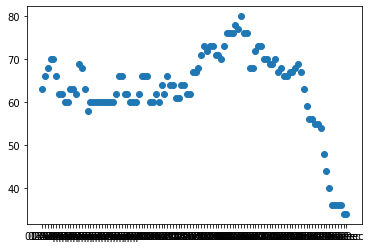

In [34]:
df = pd.read_csv('potato.csv')
array=df['p/kg'].tolist()
array
plt.scatter(df['Date'],array)
plt.show()

In [35]:
labels=df['Arrival']
relative_change=[]
temp=[]
for i in range(1,len(labels)):
    result=(labels[i]-labels[i-1])/labels[i-1]
    relative_change.append(result)
    label=-2
    if result>0:
        label=1
    elif result==0:
        label=0
    else:
        label=-1
    temp.append(label)
relative_change.append(0)
new_temp = [0]+temp
new_temp

[0,
 -1,
 1,
 1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 0,
 0,
 -1,
 -1,
 0,
 1,
 -1,
 1,
 1,
 0,
 0,
 0,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 0,
 -1,
 1,
 1,
 1,
 -1,
 0,
 1,
 -1,
 1,
 -1,
 -1,
 0,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 0,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1]

In [36]:
df['yms']=new_temp
df['relative_change']=relative_change
df.tail(20)
# df.to_csv('result.csv')

,Date,p/kg,Arrival,yms,relative_change
88,28-Nov,67,2400,1,0.041667
89,29-Nov,68,2500,1,-0.120000
90,30-Nov,69,2200,-1,1.363636
91,01-Dec,67,5200,1,-0.009615
92,02-Dec,63,5150,-1,0.320388
93,03-Dec,59,6800,1,0.117647
94,04-Dec,56,7600,1,0.302632
95,05-Dec,56,9900,1,-0.277778
96,06-Dec,55,7150,-1,-0.384615
97,07-Dec,55,4400,-1,0.204545


In [37]:
from sklearn.model_selection import train_test_split
df2=df.iloc[:93]
training_data,testing_data=train_test_split(df,test_size=0.05,shuffle=False)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")
# training_data.tail(5)

No. of training examples: 102
No. of testing examples: 6


In [38]:
X_train,Y_train,X_test,Y_test=training_data[['p/kg','Arrival']],training_data['yms'],testing_data[['p/kg','Arrival']],testing_data['yms']
# X_train=X_train.append(pd.Series([65],index=[92]))
# X_test=X_test[1:]

X_train=X_train.to_numpy()
Y_train=Y_train.to_numpy()
X_test=X_test.to_numpy()
Y_test=Y_test.to_numpy()
print(type(X_test))

<class 'numpy.ndarray'>


In [39]:
import numpy as np
def euclidean_dist(X_test, X_train):
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    a = np.zeros(num_test)
    b = np.zeros(num_train)
    for i in range(num_test):
        a[i] = np.dot(X_test[i], X_test[i])
    for j in range(num_train):
        b[j] = np.dot(X_train[j], X_train[j])  
    for i in range(num_test):
        for j in range(num_train):
            dists[i, j] = a[i] + b[j] - 2 * np.dot(X_test[i], X_train[j])
    

    return dists
    

print(len(X_test))
dicts=euclidean_dist(np.array(X_test[:1]),X_train)


6


In [40]:
# k neareast neighbour
def find_k_neighbors(dists, Y_train, k):
    num_test = dists.shape[0]
    neighbors = np.zeros((num_test, k))
    sorted_idx = dists.argsort(axis=1)
    for i in range(num_test):
        neighbors[i] = Y_train[sorted_idx[i][:k]]
    return neighbors

neighbours=find_k_neighbors(dicts,Y_train,5)
neighbours

array([[-1., -1.,  1.,  0.,  1.]])

In [41]:
def knn_predict(X_test, X_train, Y_train, k):
    num_test = X_test.shape[0]
    Y_pred = np.zeros(num_test, dtype=int)
    dists = euclidean_dist(X_test, X_train)
    neighbors = find_k_neighbors(dists, Y_train, k)

    for i in range(num_test):
        value, counts = np.unique(neighbors[i], return_counts=True)
        idx = np.argmax(counts)
        Y_pred[i] = value[idx]
        if len(X_test)>0:
            new_dist=euclidean_dist(X_test[:1],X_train)
           
            np.append(dicts,new_dist[0])
            
            Y_train=np.append(Y_train, Y_pred[i])
            # print(Y_train.tail(5))
            neighbors = find_k_neighbors(dists, Y_train, k)
            X_train=np.append(X_train, X_test[:1])
            X_test=np.delete( X_test,0)
    
    return Y_pred
k=2
Y_pred = knn_predict(X_test, X_train, Y_train, k)


In [42]:

k=5
Y_pred = knn_predict(X_test, X_train, Y_train, k)


In [43]:
def compute_error_rate(ypred, ytrue):
  
  error_rate=0
  err = 0
  num_test=len(ypred)
  for i in range(num_test):
      err = err + (ypred[i] != ytrue[i])  
  error_rate = err / num_test * 100
  return error_rate
  
ypred=Y_pred.tolist()
ytrue=Y_test.tolist()
print('accuracy: ',100-compute_error_rate(ypred,ytrue))

accuracy:  83.33333333333334


In [44]:
ytrue

[1, -1, -1, 1, -1, 1]

In [45]:
ypred

[-1, -1, -1, 1, -1, 1]

In [46]:
df.iloc[86]

Date               26-Nov
p/kg                   66
Arrival              1600
yms                    -1
relative_change    0.4375
Name: 86, dtype: object

In [47]:
def compute_metrics(y_pred, y_true):
  
   
    from sklearn.metrics import f1_score
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score

    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return acc, cm, f1



In [48]:
compute_metrics(ypred,ytrue)

(0.8333333333333334,
 array([[3, 0],
        [1, 2]]),
 0.8)

In [49]:
def split_nfold(num_examples, n):
  idx = np.random.permutation(num_examples).tolist()
  fold_size = num_examples//n
  train_sets = []
  validation_sets = []
  for i in range(n):
      start = i*fold_size
      end = (i+1)*fold_size
      if i == n-1:
        end = num_examples
      train_set = idx[:start] + idx[end:]
      train_sets.append(train_set)
      val_set = idx[start:end]
      validation_sets.append(val_set)
  return train_sets, validation_sets


train_sets, val_sets = split_nfold(11, 5)
print(train_sets[4])
print(val_sets[4])

[1, 0, 2, 8, 4, 5, 9, 7]
[6, 10, 3]


In [50]:
def cross_validation(classifier, X, Y, n, *args):
  np.random.seed(1)
  errors = []
  size = X.shape[0]
  train_sets, val_sets = split_nfold(size, n)
  for (train_index, val_index) in zip(train_sets, val_sets):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

    ypred = classifier(X_val, X_train, y_train, *args)
    errors.append(compute_error_rate(ypred, y_val))
  error_rate = np.mean(errors)
  
  return error_rate 


n = 5
k = 3
cross_validation(knn_predict, X_train, Y_train, n, k)

44.81818181818182

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [52]:
df2 = df.drop(['yms','relative_change','Date'],axis=1)
df2

,p/kg,Arrival
0,63,600
1,66,350
2,68,450
3,70,600
4,70,500
...,...,...
103,36,4200
104,36,3800
105,36,6600
106,34,4500


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,-1],df2.iloc[:,0])

In [54]:
model.fit(X_train.array.reshape(-1,1),y_train)


LinearRegression()

In [55]:
y_pred = model.predict(X_test.array.reshape(-1,1))

In [56]:
model.score(X_test.array.reshape(-1,1),y_test)

0.3084586916629257

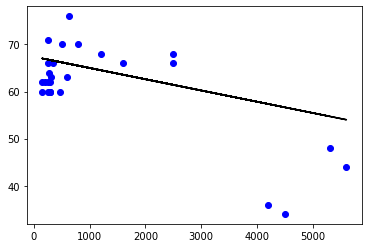

In [57]:
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [31]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(max_depth=2)


In [58]:
random_forest.fit(X_train.array.reshape(-1,1),y_train)

RandomForestRegressor(max_depth=2)

In [59]:
y_pred = random_forest.predict(X_test.array.reshape(-1,1))

In [60]:
random_forest.score(X_test.array.reshape(-1,1),y_test)

0.7437601901981533

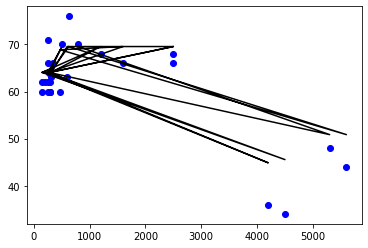

In [44]:
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [45]:
from sklearn.ensemble import AdaBoostRegressor
ada_model = AdaBoostRegressor()


In [47]:
ada_model.fit(X_train.array.reshape(-1,1),y_train)

AdaBoostRegressor()

In [53]:
y_pred = ada_model.predict(X_test.array.reshape(-1,1))

In [51]:
ada_model.score(X_test.array.reshape(-1,1),y_test)

0.713882739308866

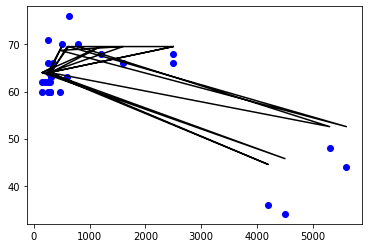

In [61]:
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


In [58]:
gb_model.fit(X_train.array.reshape(-1,1),y_train)

GradientBoostingRegressor()

In [59]:
y_pred = gb_model.predict(X_test.array.reshape(-1,1))

In [60]:
gb_model.score(X_test.array.reshape(-1,1),y_test)

0.42395390450547144

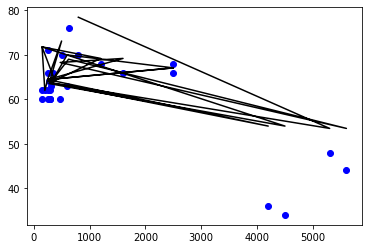

In [61]:
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()